In [1]:
import pandas as pd
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
PATH = "../dados/brutos/HIST_PAINEL_COVIDBR_20200514.xlsx"

In [3]:
data_df = pd.read_excel(PATH)

In [4]:
data_df["data"] = pd.to_datetime(data_df["data"])
data_df.sort_values(by="data", inplace=True)

In [5]:
data_df.tail()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,obitosAcumulado,Recuperadosnovos,emAcompanhamentoNovos
9424,Nordeste,CE,Apuiarés,23,230090.0,23002.0,2ª Região Caucaia,2020-05-14,20,14600.0,11,2,NaN,NaN
34698,Norte,PA,Mocajuba,15,150460.0,15011.0,Tocantins,2020-05-14,20,31136.0,42,0,NaN,NaN
73398,Sul,RS,Paim Filho,43,431360.0,43018.0,Região 18 - Araucárias,2020-05-14,20,3828.0,3,0,NaN,NaN
19140,Nordeste,PE,Carnaubeira da Penha,26,260392.0,26012.0,Serra Talhada,2020-05-14,20,12932.0,2,1,NaN,NaN
75800,Sul,RS,NaN,43,NaN,NaN,NaN,2020-05-14,20,11377239.0,2997,120,NaN,NaN


# Análise do Brasil

In [6]:
brasil_df = data_df[data_df["regiao"] == "Brasil"]

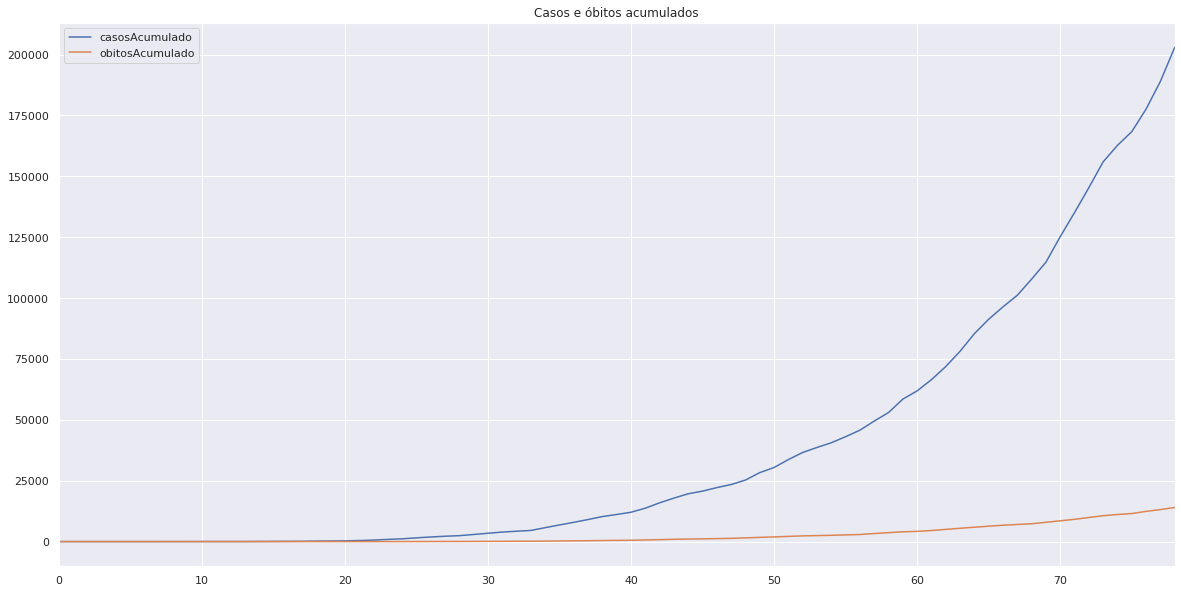

In [7]:
brasil_df[["casosAcumulado", "obitosAcumulado"]].plot(title="Casos e óbitos acumulados")

# Análise de estados

In [8]:
aux_df = data_df[data_df["regiao"] != "Brasil"]
aux_df = aux_df[["regiao", "estado", "data", "municipio", "casosAcumulado", "obitosAcumulado"]]

In [9]:
aux_df = aux_df.groupby(["data", "estado"]).sum()
aux_df.reset_index(inplace=True)

In [10]:
aux_df.tail()

,data,estado,casosAcumulado,obitosAcumulado
1675,2020-05-14,RS,5994,240
1676,2020-05-14,SC,8664,156
1677,2020-05-14,SE,4988,94
1678,2020-05-14,SP,108572,8630
1679,2020-05-14,TO,2058,46


In [11]:
estados_df = aux_df.set_index("data").pivot(columns="estado")

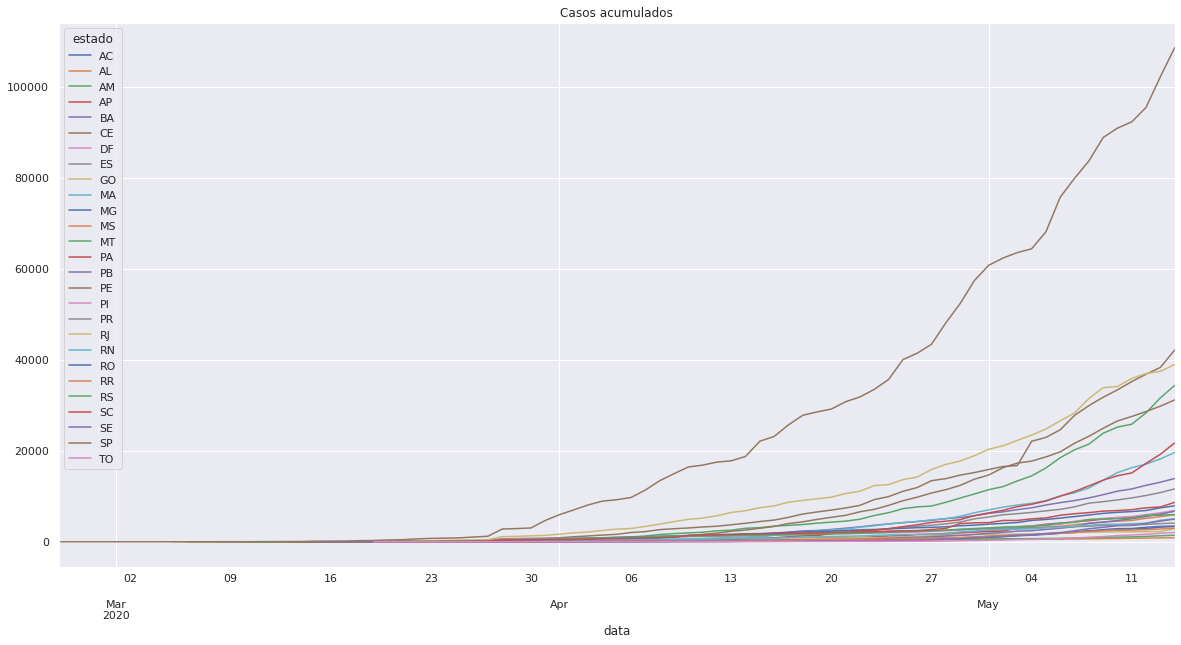

In [12]:
estados_df["casosAcumulado"].plot(title="Casos acumulados")

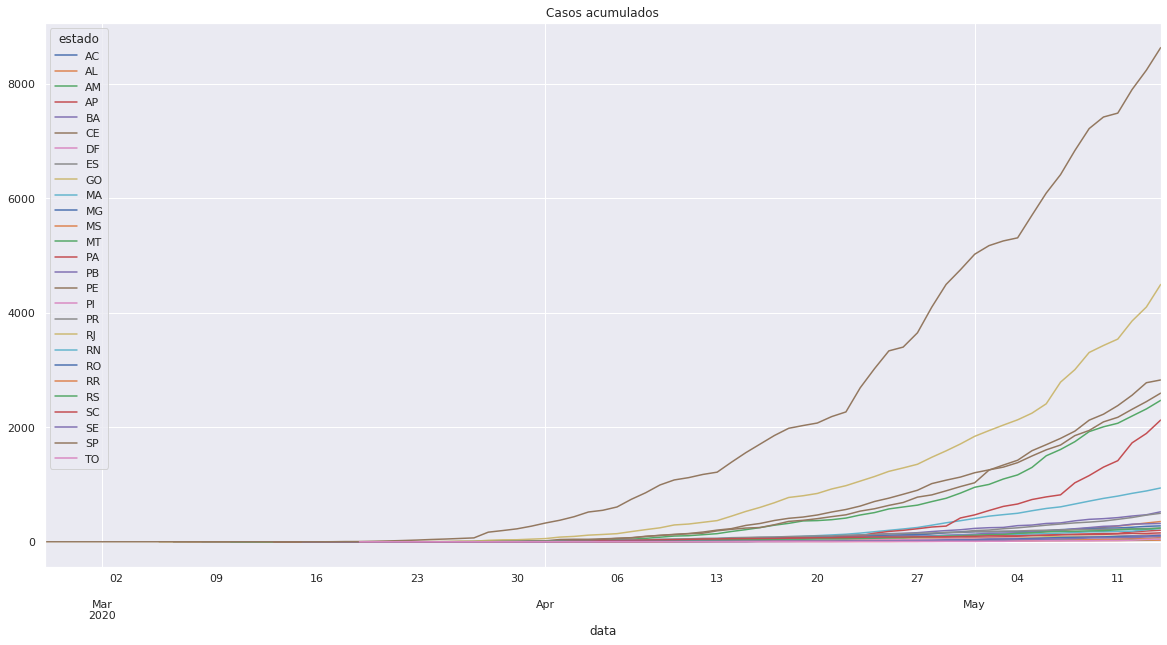

In [13]:
estados_df["obitosAcumulado"].plot(title="Casos acumulados")

# Análise de regiões

In [14]:
regioes_df = data_df[data_df["regiao"] != "Brasil"].groupby(["data", "nomeRegiaoSaude", "regiao"]).sum()

In [15]:
regioes_df.reset_index(inplace=True)
regioes_df = regioes_df.groupby(["data", "regiao"]).sum()

In [16]:
regioes_df.tail(5)

coduf       codmun  codRegiaoSaude  semanaEpi  \
data       regiao                                                        
2020-05-14 Centro-Oeste   8207   82198413.0       8208150.0       3200   
           Nordeste      28734  288340371.0      28744141.0      23120   
           Norte          4780   47932961.0       4781667.0       6640   
           Sudeste       29445  296827095.0      29499190.0      17700   
           Sul           22681  227470948.0      22687754.0      10780   

                         populacaoTCU2019  casosAcumulado  obitosAcumulado  \
data       regiao                                                            
2020-05-14 Centro-Oeste        13291104.0            5987              151   
           Nordeste            50105198.0           66195             3991   
           Norte               17607341.0           37412             2569   
           Sudeste             81786088.0           83191             6949   
           Sul                 24974257.0            9359              317   

                         Recuperadosnovos  emAcompanhamentoNovos  
data       regiao                                                 
2020-05-14 Centro-Oeste               0.0                    0.0  
           Nordeste                   0.0                    0.0  
           Norte                      0.0                    0.0  
           Sudeste                    0.0                    0.0  
           Sul                        0.0                    0.0

In [17]:
# Indexando apenas pela data
regioes_df = regioes_df.reset_index().set_index("data")

In [18]:
regioes_df

,regiao,coduf,codmun,codRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,obitosAcumulado,Recuperadosnovos,emAcompanhamentoNovos
data,,,,,,,,,,
2020-03-28,Centro-Oeste,1030,10315715.0,1030098.0,260,8700229.0,360,1,0.0,0.0
2020-03-28,Nordeste,1479,14846225.0,1479505.0,741,20158395.0,626,9,0.0,0.0
2020-03-28,Norte,267,2675520.0,267078.0,247,7723706.0,184,1,0.0,0.0
2020-03-28,Sudeste,3236,32613852.0,3239489.0,1261,48995853.0,2171,96,0.0,0.0
2020-03-28,Sul,4389,44005916.0,4390224.0,1352,15060019.0,502,5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-05-14,Centro-Oeste,8207,82198413.0,8208150.0,3200,13291104.0,5987,151,0.0,0.0
2020-05-14,Nordeste,28734,288340371.0,28744141.0,23120,50105198.0,66195,3991,0.0,0.0
2020-05-14,Norte,4780,47932961.0,4781667.0,6640,17607341.0,37412,2569,0.0,0.0


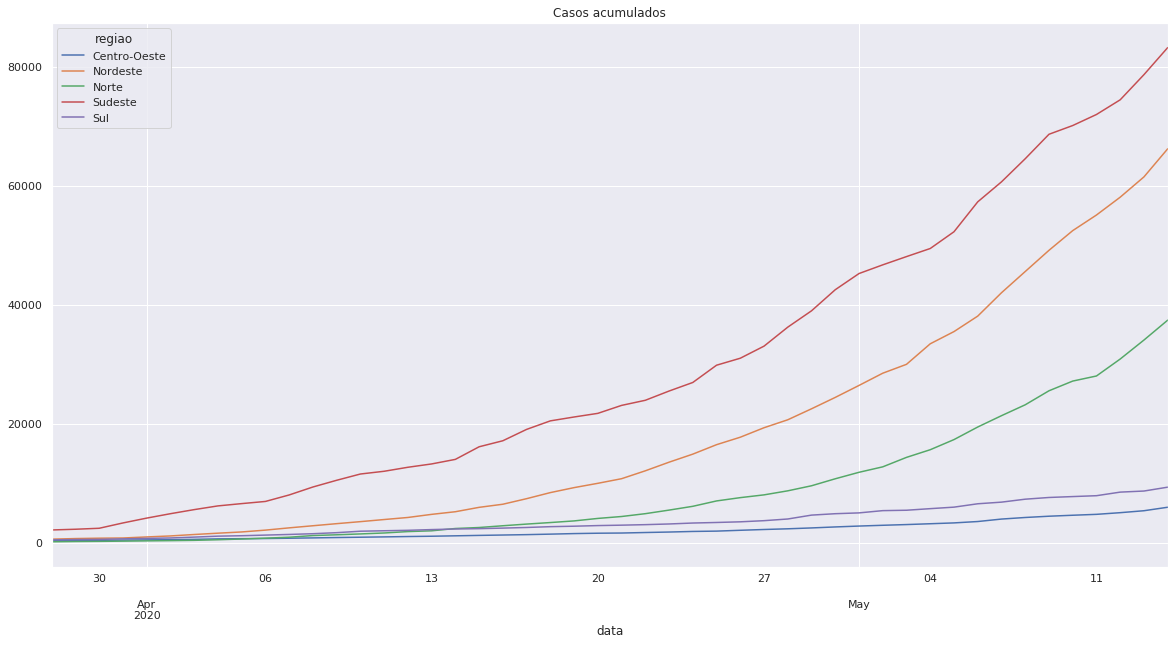

In [19]:
final_reg_df = regioes_df.pivot(columns="regiao")
final_reg_df["casosAcumulado"].plot(title="Casos acumulados")

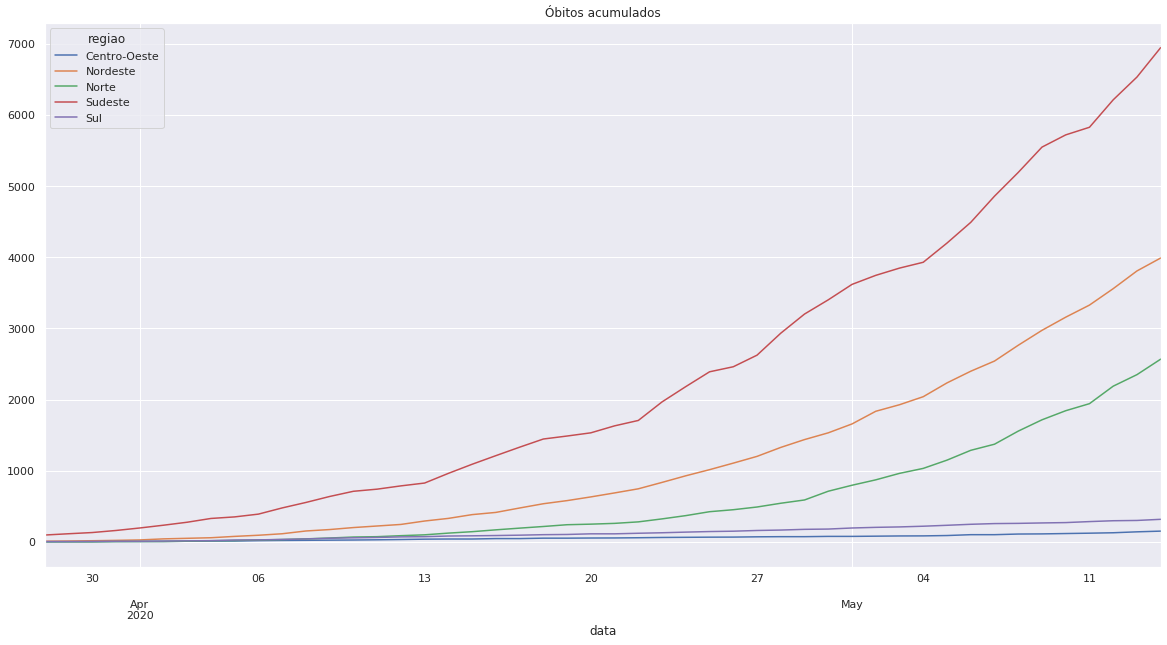

In [20]:
final_reg_df["obitosAcumulado"].plot(title="Óbitos acumulados")

In [21]:
final_reg_df.tail()

coduf                                     codmun  \
regiao     Centro-Oeste Nordeste Norte Sudeste    Sul Centro-Oeste   
data                                                                 
2020-05-10         7592    26296  4461   26894  20996   76037253.0   
2020-05-11         7644    26785  4540   27184  21334   76558195.0   
2020-05-12         7643    27381  4685   27846  22097   76547175.0   
2020-05-13         7794    27989  4687   28786  22262   78060563.0   
2020-05-14         8207    28734  4780   29445  22681   82198413.0   

                                                               ...  \
regiao         Nordeste       Norte      Sudeste          Sul  ...   
data                                                           ...   
2020-05-10  263863517.0  44732211.0  271058704.0  210568307.0  ...   
2020-05-11  268768022.0  45524833.0  273981304.0  213958298.0  ...   
2020-05-12  274759253.0  46980289.0  280651430.0  221612059.0  ...   
2020-05-13  280859733.0  47000459.0  290168327.0  223270944.0  ...   
2020-05-14  288340371.0  47932961.0  296827095.0  227470948.0  ...   

           Recuperadosnovos                             emAcompanhamentoNovos  \
regiao         Centro-Oeste Nordeste Norte Sudeste  Sul          Centro-Oeste   
data                                                                            
2020-05-10              0.0      0.0   0.0     0.0  0.0                   0.0   
2020-05-11              0.0      0.0   0.0     0.0  0.0                   0.0   
2020-05-12              0.0      0.0   0.0     0.0  0.0                   0.0   
2020-05-13              0.0      0.0   0.0     0.0  0.0                   0.0   
2020-05-14              0.0      0.0   0.0     0.0  0.0                   0.0   

                                        
regiao     Nordeste Norte Sudeste  Sul  
data                                    
2020-05-10      0.0   0.0     0.0  0.0  
2020-05-11      0.0   0.0     0.0  0.0  
2020-05-12      0.0   0.0     0.0  0.0  
2020-05-13      0.0   0.0     0.0  0.0  
2020-05-14      0.0   0.0     0.0  0.0  

[5 rows x 45 columns]

# Análise de estados

In [22]:
aux_df = data_df[data_df["regiao"] != "Brasil"]
aux_df = aux_df[["estado", "data", "municipio", "casosAcumulado", "obitosAcumulado"]]

In [23]:
aux_df = aux_df.groupby(["data", "estado"]).sum()
aux_df.reset_index(inplace=True)

In [24]:

estados_df = aux_df.set_index("data").pivot(columns="estado")

In [25]:
estados_df.head()

casosAcumulado                                      ...  \
estado                 AC  AL  AM  AP  BA  CE  DF  ES  GO  MA  ...   
data                                                           ...   
2020-02-26            NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   
2020-02-27            NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   
2020-02-28            NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   
2020-02-29            NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   
2020-03-01            NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   

           obitosAcumulado                                       
estado                  PR  RJ  RN  RO  RR  RS  SC  SE   SP  TO  
data                                                             
2020-02-26             NaN NaN NaN NaN NaN NaN NaN NaN  0.0 NaN  
2020-02-27             NaN NaN NaN NaN NaN NaN NaN NaN  0.0 NaN  
2020-02-28             NaN NaN NaN NaN NaN NaN NaN NaN  0.0 NaN  
2020-02-29             NaN NaN NaN NaN NaN NaN NaN NaN  0.0 NaN  
2020-03-01             NaN NaN NaN NaN NaN NaN NaN NaN  0.0 NaN  

[5 rows x 54 columns]

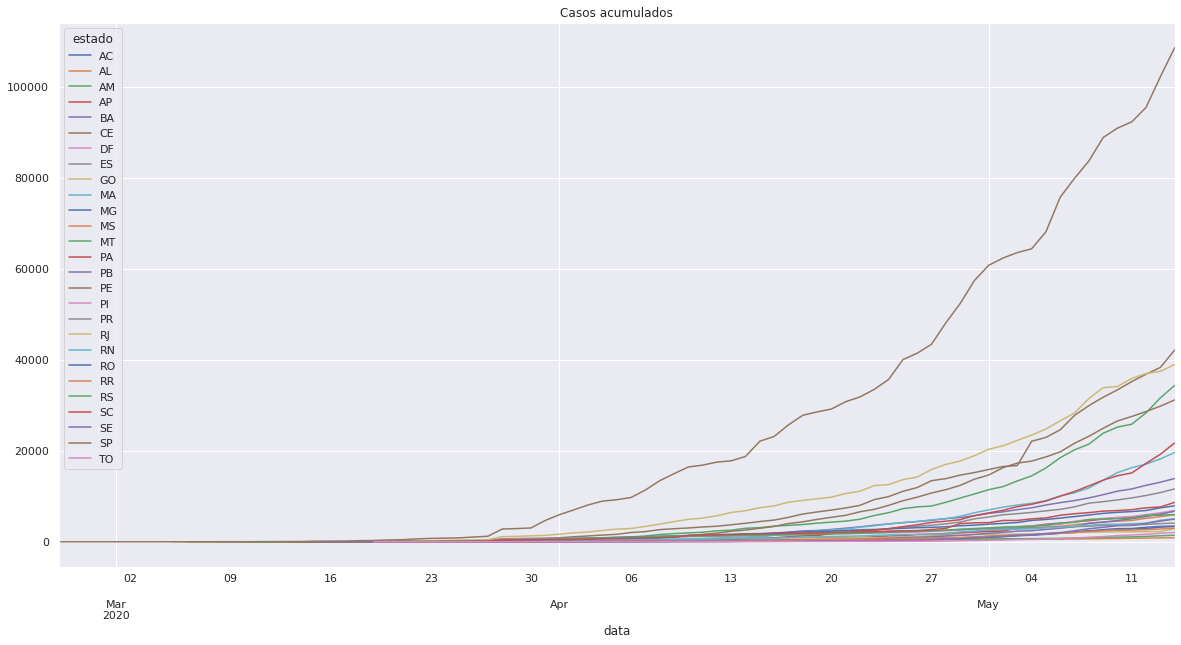

In [26]:
estados_df["casosAcumulado"].plot(title="Casos acumulados")

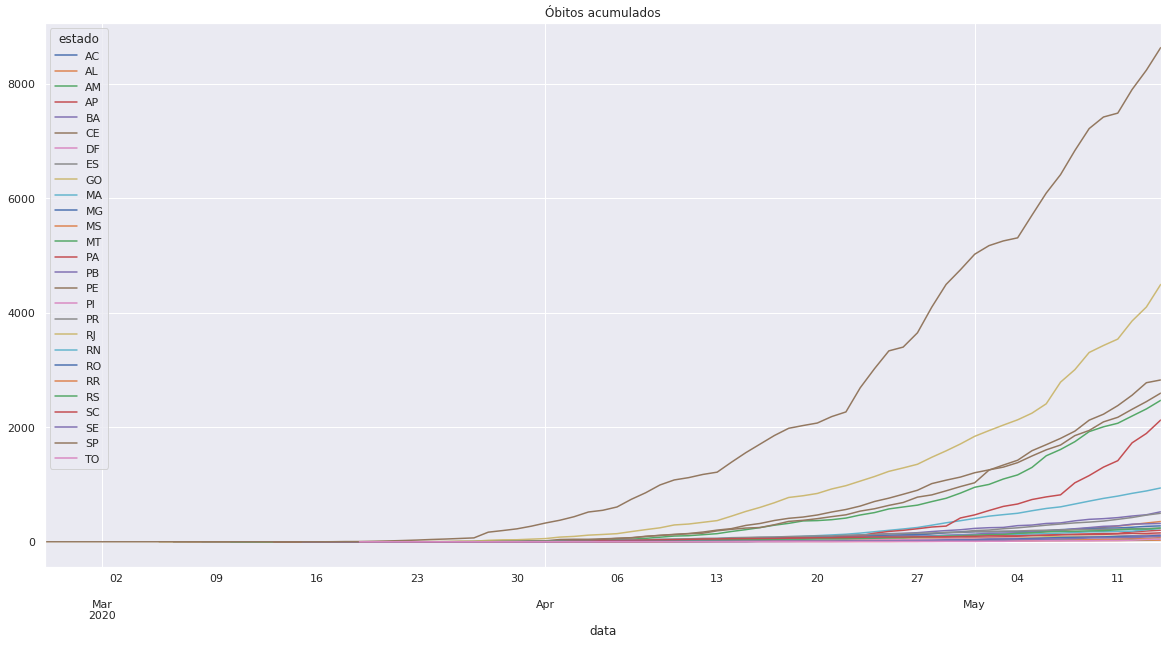

In [27]:
estados_df["obitosAcumulado"].plot(title="Óbitos acumulados")


# Visualização dos dados mais recentes

In [28]:
final_reg_df.iloc[-1]["casosAcumulado"]

regiao
Centro-Oeste     5987.0
Nordeste        66195.0
Norte           37412.0
Sudeste         83191.0
Sul              9359.0
Name: 2020-05-14 00:00:00, dtype: float64

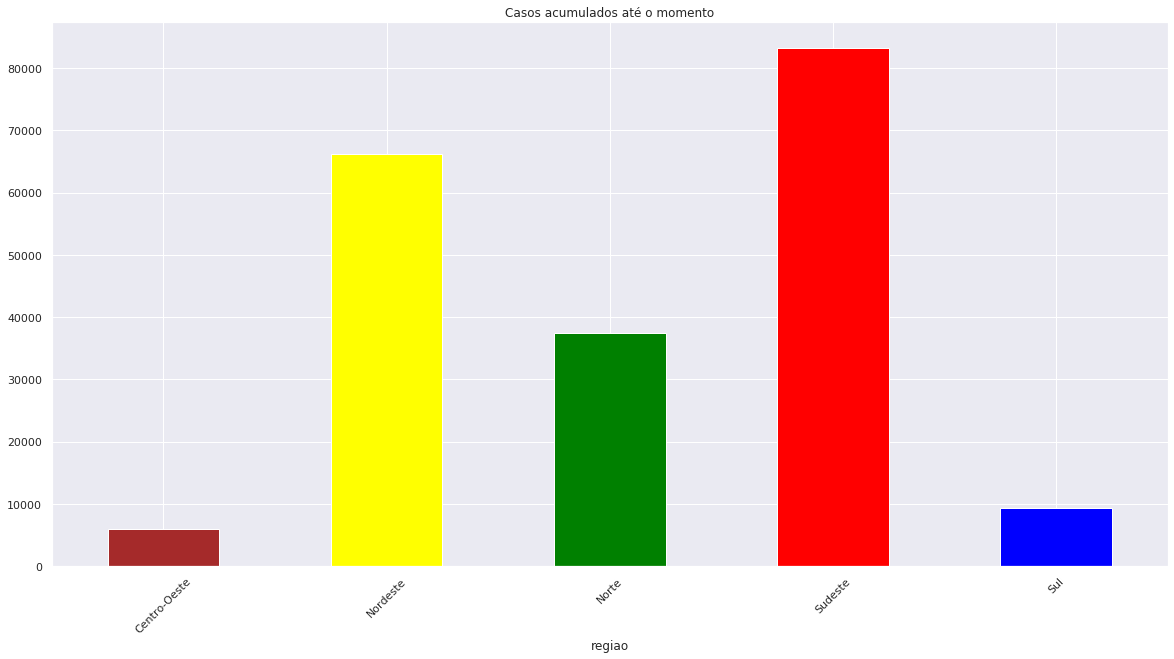

In [29]:
final_reg_df.iloc[-1]["casosAcumulado"].plot.bar(rot=45, color=["brown", "yellow", "green", "red", "blue", "pink"], title="Casos acumulados até o momento")

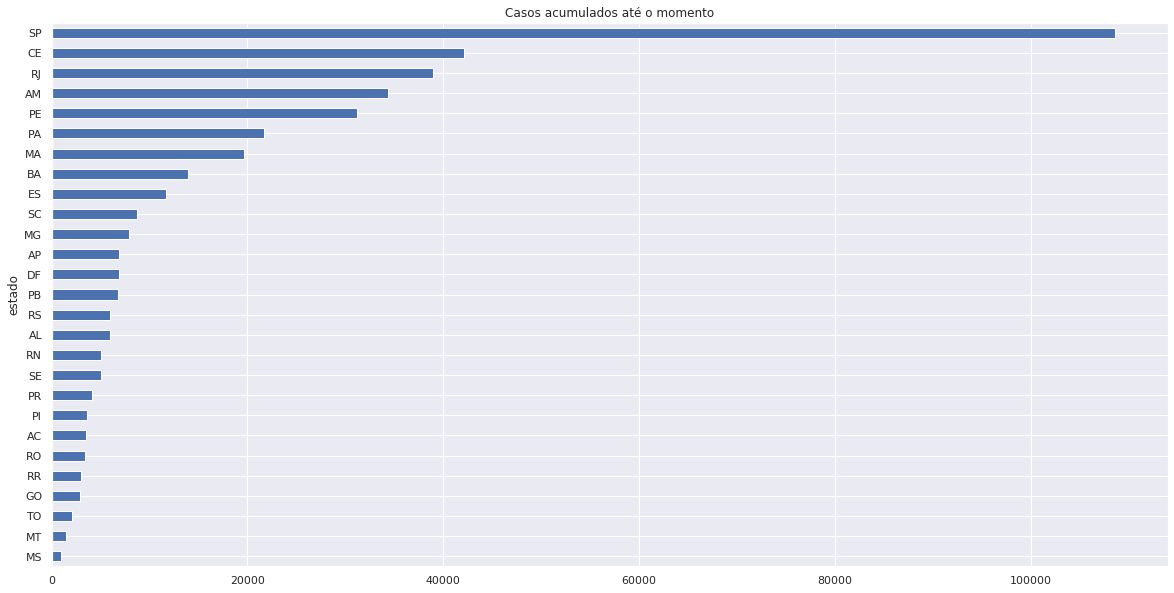

In [30]:
estados_df.iloc[-1]["casosAcumulado"].sort_values().plot.barh(title="Casos acumulados até o momento")

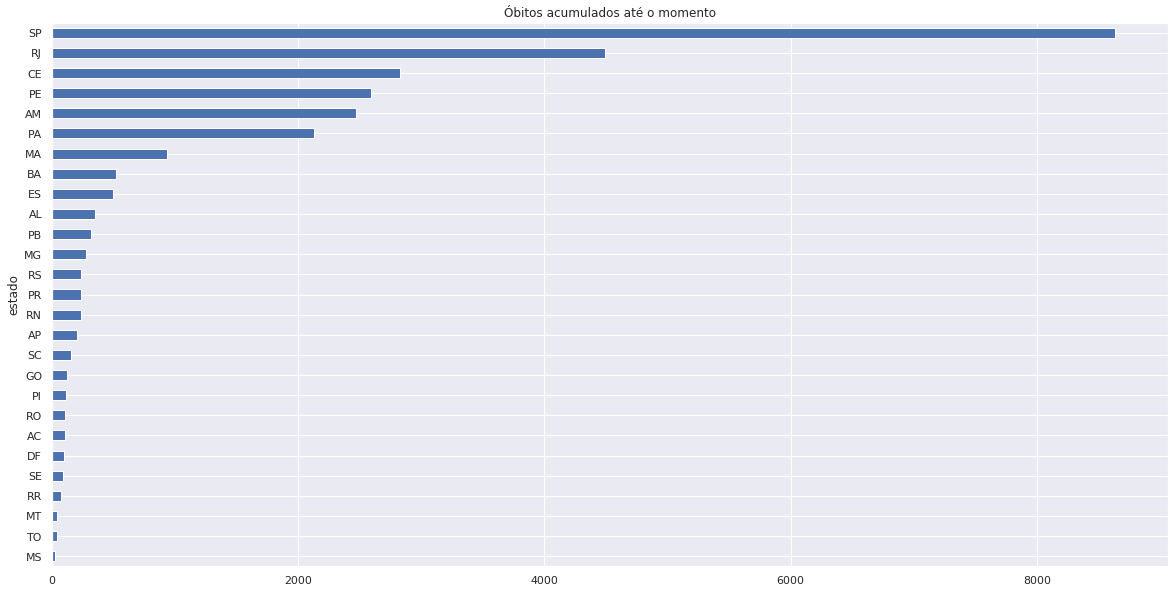

In [31]:
estados_df.iloc[-1]["obitosAcumulado"].sort_values().plot.barh(title="Óbitos acumulados até o momento")

In [32]:
# TODO exportar para tratados como planilha excel